<a href="https://colab.research.google.com/github/ReyesAnd/TelecomX/blob/main/TelecomX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#TelecomX procesamiento de datos


##Importando el pd

In [198]:
import pandas as pd
pd.set_option('display.max_columns', None)

url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json'

df = pd.read_json(url)
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [199]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [200]:
df.dtypes

,0
customerID,object
Churn,object
customer,object
phone,object
internet,object
account,object


##Desglozando los diccionarios encontrados en el df.

In [201]:
customer_df = pd.DataFrame(df['customer'].tolist())

df = pd.concat([df.drop(columns=['customer']), customer_df], axis=1)

In [202]:
phone_df = pd.DataFrame(df['phone'].tolist())

df = pd.concat([df.drop(columns=['phone']), phone_df], axis=1)

In [203]:
internet_df = pd.DataFrame(df['internet'].tolist())

df = pd.concat([df.drop(columns=['internet']), internet_df], axis=1)

In [204]:
account_df = pd.DataFrame(df['account'].tolist())

df = pd.concat([df.drop(columns=['account']), account_df], axis=1)

In [205]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        7267 non-null   object
 1   Churn             7267 non-null   object
 2   gender            7267 non-null   object
 3   SeniorCitizen     7267 non-null   int64 
 4   Partner           7267 non-null   object
 5   Dependents        7267 non-null   object
 6   tenure            7267 non-null   int64 
 7   PhoneService      7267 non-null   object
 8   MultipleLines     7267 non-null   object
 9   InternetService   7267 non-null   object
 10  OnlineSecurity    7267 non-null   object
 11  OnlineBackup      7267 non-null   object
 12  DeviceProtection  7267 non-null   object
 13  TechSupport       7267 non-null   object
 14  StreamingTV       7267 non-null   object
 15  StreamingMovies   7267 non-null   object
 16  Contract          7267 non-null   object
 17  PaperlessBilli

In [206]:
df.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,"{'Monthly': 65.6, 'Total': '593.3'}"
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,"{'Monthly': 59.9, 'Total': '542.4'}"
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,"{'Monthly': 73.9, 'Total': '280.85'}"
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,"{'Monthly': 98.0, 'Total': '1237.85'}"
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,"{'Monthly': 83.9, 'Total': '267.4'}"


In [207]:
Charges_df = pd.DataFrame(df['Charges'].tolist())

df = pd.concat([df.drop(columns=['Charges']), Charges_df], axis=1)

In [208]:
df['Total'] = df['Total'].str.strip()

In [209]:
import numpy as np
df['Total'] = df['Total'].replace('', np.nan)

In [210]:
df['Total'] = pd.to_numeric(df['Total'], errors='coerce')

In [211]:
df = df.dropna(subset=['Total'])

In [274]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7256 entries, 0 to 7266
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7256 non-null   object  
 1   Churn             7256 non-null   int64   
 2   gender            7256 non-null   object  
 3   SeniorCitizen     7256 non-null   int64   
 4   Partner           7256 non-null   int64   
 5   Dependents        7256 non-null   int64   
 6   tenure            7256 non-null   int64   
 7   PhoneService      7256 non-null   int64   
 8   MultipleLines     7256 non-null   int64   
 9   InternetService   7256 non-null   object  
 10  OnlineSecurity    7256 non-null   int64   
 11  OnlineBackup      7256 non-null   int64   
 12  DeviceProtection  7256 non-null   int64   
 13  TechSupport       7256 non-null   int64   
 14  StreamingTV       7256 non-null   int64   
 15  StreamingMovies   7256 non-null   int64   
 16  Contract          7256 non-nu

In [213]:
df.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Monthly,Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40


##Convirtiendo columnas de texto en valores binarios mas faciles de tratar. Los valores Nan fueron asumidos como 'no'.

In [214]:
df['Total'] = df['Total'].astype(float)

In [215]:
df['Churn'].unique()

array(['No', 'Yes', ''], dtype=object)

In [216]:
df['Churn'] = (
    df['Churn']
    .str.strip()
    .str.lower()
    .replace('', 'no')
    .map({'yes': 1, 'no': 0})
)

In [217]:
df['Partner'].unique()

array(['Yes', 'No'], dtype=object)

In [218]:
df['Partner'] = (
    df['Partner']
    .str.strip()
    .str.lower()
    .map({'yes': 1, 'no': 0})
)

In [219]:
df['Dependents'].unique()

array(['Yes', 'No'], dtype=object)

In [220]:
df['Dependents'] = (
    df['Dependents']
    .str.strip()
    .str.lower()
    .map({'yes': 1, 'no': 0})
)

In [221]:
df['PhoneService'].unique()

array(['Yes', 'No'], dtype=object)

In [222]:
df['PhoneService'] = (
    df['PhoneService']
    .str.strip()
    .str.lower()
    .map({'yes': 1, 'no': 0})
)

In [223]:
df['MultipleLines'].unique()

array(['No', 'Yes', 'No phone service'], dtype=object)

In [224]:
df['MultipleLines'] = (
    df['MultipleLines']
    .str.strip()
    .str.lower()
    .replace('No phone service', 'no')
    .map({'yes': 1, 'no': 0})
)

In [225]:
df['MultipleLines'] = df['MultipleLines'].fillna(0).astype(int)

In [226]:
df['OnlineBackup'].unique()

array(['Yes', 'No', 'No internet service'], dtype=object)

In [227]:
df['OnlineBackup'] = (
    df['OnlineBackup']
    .str.strip()
    .str.lower()
    .replace('No internet service', 'no')
    .map({'yes': 1, 'no': 0})
)

In [228]:
df['OnlineBackup'] = df['OnlineBackup'].fillna(0).astype(int)

In [229]:
df['OnlineSecurity'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [230]:
df['OnlineSecurity'] = (
    df['OnlineSecurity']
    .str.strip()
    .str.lower()
    .replace('No internet service', 'no')
    .map({'yes': 1, 'no': 0})
)

In [231]:
df['OnlineSecurity'] = df['OnlineSecurity'].fillna(0).astype(int)

In [232]:
df['DeviceProtection'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [233]:
df['DeviceProtection'] = (
    df['DeviceProtection']
    .str.strip()
    .str.lower()
    .replace('No internet service', 'no')
    .map({'yes': 1, 'no': 0})
)

In [234]:
df['DeviceProtection'] = df['DeviceProtection'].fillna(0).astype(int)

In [235]:
df['TechSupport'].unique()

array(['Yes', 'No', 'No internet service'], dtype=object)

In [236]:
df['TechSupport'] = (
    df['TechSupport']
    .str.strip()
    .str.lower()
    .replace('No internet service', 'no')
    .map({'yes': 1, 'no': 0})
)

In [237]:
df['TechSupport'] = df['TechSupport'].fillna(0).astype(int)

In [238]:
df['StreamingTV'].unique()

array(['Yes', 'No', 'No internet service'], dtype=object)

In [239]:
df['StreamingTV'] = (
    df['StreamingTV']
    .str.strip()
    .str.lower()
    .replace('No internet service', 'no')
    .map({'yes': 1, 'no': 0})
)

In [240]:
df['StreamingTV'] = df['StreamingTV'].fillna(0).astype(int)

In [241]:
df['StreamingMovies'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [242]:
df['StreamingMovies'] = (
    df['StreamingMovies']
    .str.strip()
    .str.lower()
    .replace('No internet service', 'no')
    .map({'yes': 1, 'no': 0})
)

In [243]:
df['StreamingMovies'] = df['StreamingMovies'].fillna(0).astype(int)

In [244]:
df['PaperlessBilling'].unique()

array(['Yes', 'No'], dtype=object)

In [245]:
df['PaperlessBilling'] = (
    df['PaperlessBilling']
    .str.strip()
    .str.lower()
    .replace('No internet service', 'no')
    .map({'yes': 1, 'no': 0})
)

In [246]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7256 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7256 non-null   object 
 1   Churn             7256 non-null   int64  
 2   gender            7256 non-null   object 
 3   SeniorCitizen     7256 non-null   int64  
 4   Partner           7256 non-null   int64  
 5   Dependents        7256 non-null   int64  
 6   tenure            7256 non-null   int64  
 7   PhoneService      7256 non-null   int64  
 8   MultipleLines     7256 non-null   int64  
 9   InternetService   7256 non-null   object 
 10  OnlineSecurity    7256 non-null   int64  
 11  OnlineBackup      7256 non-null   int64  
 12  DeviceProtection  7256 non-null   int64  
 13  TechSupport       7256 non-null   int64  
 14  StreamingTV       7256 non-null   int64  
 15  StreamingMovies   7256 non-null   int64  
 16  Contract          7256 non-null   object 
 17  

In [247]:
df.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Monthly,Total
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,0,1,0,1,1,0,One year,1,Mailed check,65.6,593.30
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,0,0,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.40
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,0,0,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85
3,0011-IGKFF,1,Male,1,1,0,13,1,0,Fiber optic,0,1,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,Fiber optic,0,0,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.40


##Creando Cuentas Diarias

In [248]:
df['Total'] = df['Total'].round(2)

In [249]:
df['Monthly'] = df['Monthly'].round(2)

In [250]:
df['Daily'] = df['Monthly'] / 30

In [251]:
df['Daily'] = df['Daily'].round(2)

In [252]:
df = df.drop_duplicates()

##Analisis Descriptivo

In [253]:
df.describe()

,Churn,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,Monthly,Total,Daily
count,7256.000000,7256.0000,7256.000000,7256.000000,7256.000000,7256.000000,7256.000000,7256.000000,7256.000000,7256.000000,7256.000000,7256.000000,7256.000000,7256.000000,7256.000000,7256.000000,7256.000000
mean,0.257580,0.1629,0.483600,0.299063,32.395535,0.902839,0.421858,0.285832,0.344542,0.342751,0.289416,0.383958,0.387955,0.593716,64.755423,2280.634213,2.158467
std,0.437332,0.3693,0.499765,0.457879,24.558067,0.296197,0.493890,0.451841,0.475252,0.474662,0.453522,0.486381,0.487318,0.491173,30.125739,2268.632997,1.004282
min,0.000000,0.0000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.610000
25%,0.000000,0.0000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.450000,400.225000,1.180000
50%,0.000000,0.0000,0.000000,0.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,70.300000,1391.000000,2.340000
75%,1.000000,0.0000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.900000,3785.300000,3.000000
max,1.000000,1.0000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,118.750000,8684.800000,3.960000


##Distribucion de evasion

In [254]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

churn_counts = df['Churn'].value_counts()
churn_counts.index = ['No evasión', 'Evasión']
print(churn_counts)



No evasión    5387
Evasión       1869
Name: count, dtype: int64


/tmp/ipython-input-3786971698.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='ChurnLabel', data=df, palette=['skyblue','salmon'])


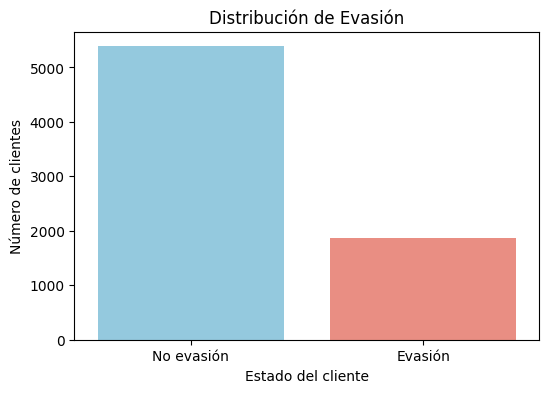

In [255]:
df['ChurnLabel'] = df['Churn'].map({0: 'No evasión', 1: 'Evasión'})

plt.figure(figsize=(6,4))
sns.countplot(x='ChurnLabel', data=df, palette=['skyblue','salmon'])
plt.title('Distribución de Evasión')
plt.xlabel('Estado del cliente')
plt.ylabel('Número de clientes')
plt.show()


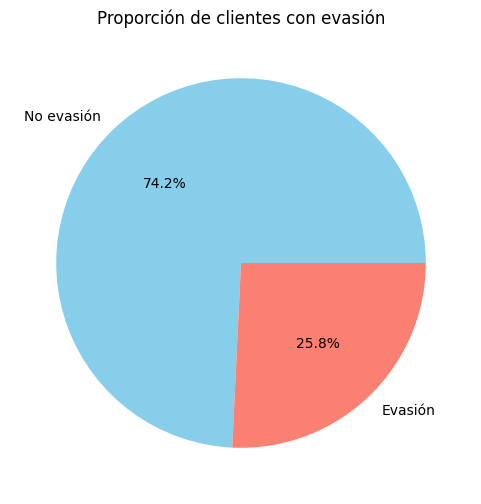

In [256]:
plt.figure(figsize=(6,6))
churn_counts.plot(kind='pie', autopct='%1.1f%%', colors=['skyblue','salmon'])
plt.title('Proporción de clientes con evasión')
plt.ylabel('')
plt.show()

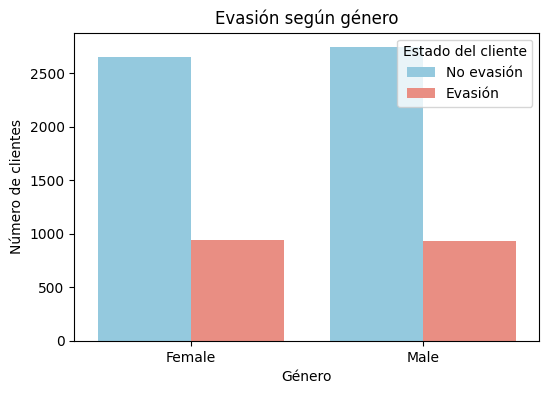

In [257]:
plt.figure(figsize=(6,4))
sns.countplot(x='gender', hue='Churn', data=df, palette=['skyblue','salmon'])
plt.title('Evasión según género')
plt.xlabel('Género')
plt.ylabel('Número de clientes')
plt.legend(title='Estado del cliente', labels=['No evasión', 'Evasión'])
plt.show()


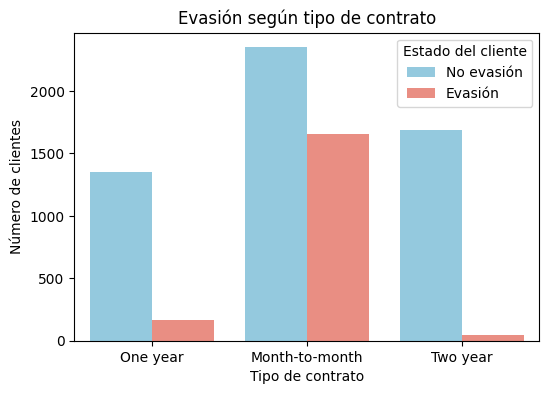

In [258]:
plt.figure(figsize=(6,4))
sns.countplot(x='Contract', hue='Churn', data=df, palette=['skyblue','salmon'])
plt.title('Evasión según tipo de contrato')
plt.xlabel('Tipo de contrato')
plt.ylabel('Número de clientes')
plt.legend(title='Estado del cliente', labels=['No evasión', 'Evasión'])
plt.show()

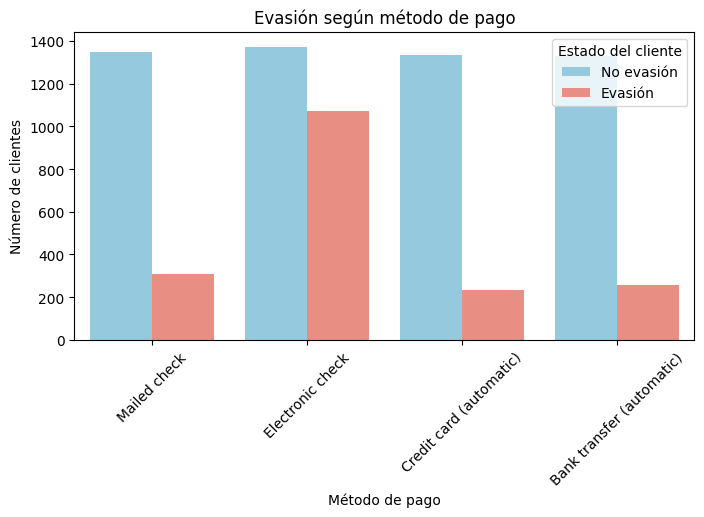

In [259]:
plt.figure(figsize=(8,4))
sns.countplot(x='PaymentMethod', hue='Churn', data=df, palette=['skyblue','salmon'])
plt.title('Evasión según método de pago')
plt.xlabel('Método de pago')
plt.ylabel('Número de clientes')
plt.xticks(rotation=45)
plt.legend(title='Estado del cliente', labels=['No evasión', 'Evasión'])
plt.show()

##Conteo de evasion por varibales numericas

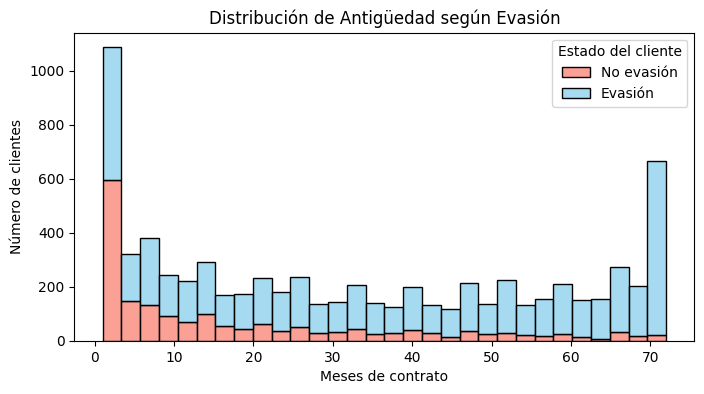

In [260]:
plt.figure(figsize=(8,4))
sns.histplot(data=df, x='tenure', hue='Churn', multiple='stack', palette=['skyblue','salmon'], bins=30)
plt.title('Distribución de Antigüedad según Evasión')
plt.xlabel('Meses de contrato')
plt.ylabel('Número de clientes')
plt.legend(title='Estado del cliente', labels=['No evasión','Evasión'])
plt.show()

/tmp/ipython-input-3509906024.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='ChurnLabel', y='tenure', data=df, palette=['skyblue','salmon'])


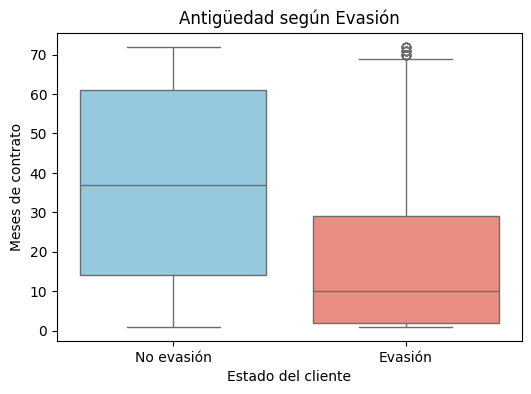

In [261]:
plt.figure(figsize=(6,4))
sns.boxplot(x='ChurnLabel', y='tenure', data=df, palette=['skyblue','salmon'])
plt.title('Antigüedad según Evasión')
plt.xlabel('Estado del cliente')
plt.ylabel('Meses de contrato')
plt.show()

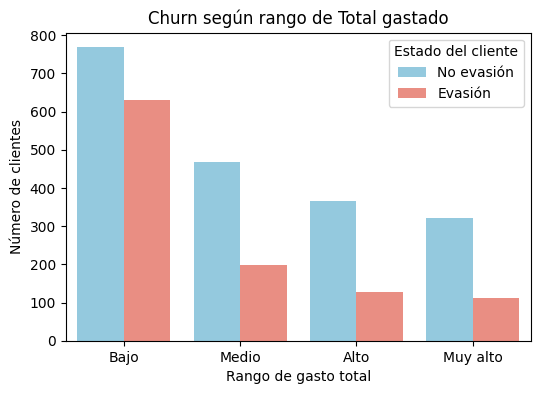

In [263]:
df['RangoGasto'] = pd.cut(df['Total'],
                          bins=[0, 250, 500, 750, 1000],
                          labels=['Bajo','Medio','Alto','Muy alto'])

plt.figure(figsize=(6,4))
sns.countplot(x='RangoGasto', hue='ChurnLabel', data=df, palette=['skyblue','salmon'])
plt.title('Churn según rango de Total gastado')
plt.xlabel('Rango de gasto total')
plt.ylabel('Número de clientes')
plt.legend(title='Estado del cliente')
plt.show()


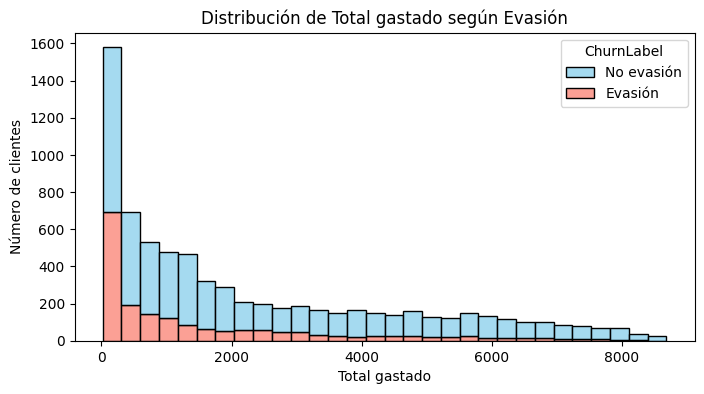

In [272]:
plt.figure(figsize=(8,4))
sns.histplot(
    data=df,
    x='Total',
    hue='ChurnLabel',
    multiple='stack',
    palette=['skyblue','salmon'],
    bins=30
)
plt.title('Distribución de Total gastado según Evasión')
plt.xlabel('Total gastado')
plt.ylabel('Número de clientes')
plt.show()

/tmp/ipython-input-2991617520.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='ChurnLabel', y='Total', data=df, palette=['skyblue','salmon'])


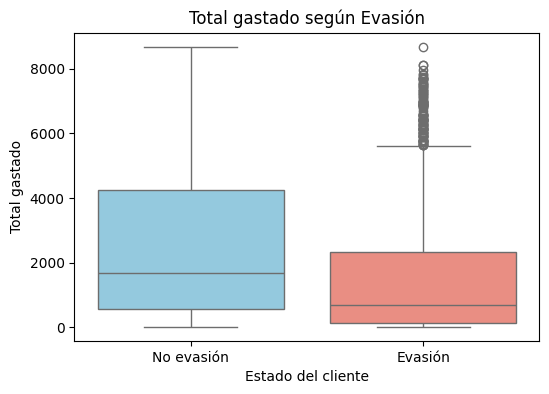

In [267]:
plt.figure(figsize=(6,4))
sns.boxplot(x='ChurnLabel', y='Total', data=df, palette=['skyblue','salmon'])
plt.title('Total gastado según Evasión')
plt.xlabel('Estado del cliente')
plt.ylabel('Total gastado')
plt.show()

#TelecomX Informe

# Informe Final - Proyecto "Churn de Clientes" en Telecom X

## 🔹 Introducción
Telecom X enfrenta una alta tasa de cancelaciones de clientes, lo que impacta directamente en la rentabilidad y sostenibilidad del negocio.  

El objetivo de este análisis fue comprender los factores que llevan a la evasión de clientes (Churn), utilizando Python y sus principales bibliotecas para extraer información valiosa.  

Este trabajo servirá como base para que el equipo de Data Science avance en modelos predictivos y diseñe estrategias de retención.

## 🔹 Limpieza y Tratamiento de Datos
- Se importaron los datos desde una API y se aplicaron procesos de **ETL (Extracción, Transformación y Carga)**.  
- Se eliminaron duplicados basados en `customerID` para asegurar consistencia.  
- Se generaron nuevas variables como `Daily` (renta diaria).  
- Se verificó la calidad de los datos y se ajustaron formatos para facilitar el análisis, como serian columnas con valores si o no, fueron llevados a 1 y 0.
- Se verifico y trato los valores nulos.
- Se trataron diccionarios de datos contenidos en columnas para que sean utilizables y directamente medibles en el analisis.

## 🔹 Análisis Exploratorio de Datos (EDA)
- **Distribución general de evasion:** Se visualizó la proporción de clientes que permanecieron vs. los que se dieron de baja.  
- **Variables categóricas:**  
  - La evasion fue mayor en clientes con contratos **mensuales**.  
  - Algunos métodos de pago (ej. facturación electrónica) mostraron mayor asociación con evasión.  
  - Variables como género no mostraron diferencias significativas.  
- **Variables numéricas:**  
  - Los clientes con menor **antigüedad (Meses de servicio)** presentaron mayor evasión.  
  - El **Total gastado** fue menor en clientes que se dieron de baja.  
  - Se observaron patrones claros en la relación entre gasto mensual y evasion.

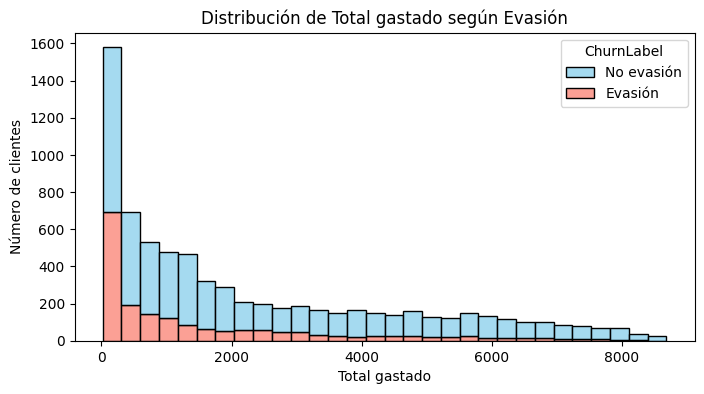

In [273]:
plt.figure(figsize=(8,4))
sns.histplot(
    data=df,
    x='Total',
    hue='ChurnLabel',
    multiple='stack',
    palette=['skyblue','salmon'],
    bins=30
)
plt.title('Distribución de Total gastado según Evasión')
plt.xlabel('Total gastado')
plt.ylabel('Número de clientes')
plt.show()

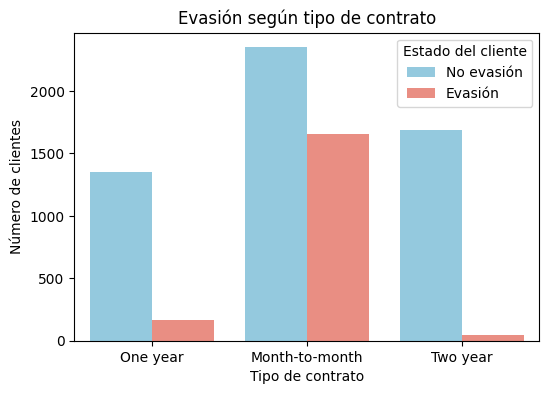

In [269]:
plt.figure(figsize=(6,4))
sns.countplot(x='Contract', hue='Churn', data=df, palette=['skyblue','salmon'])
plt.title('Evasión según tipo de contrato')
plt.xlabel('Tipo de contrato')
plt.ylabel('Número de clientes')
plt.legend(title='Estado del cliente', labels=['No evasión', 'Evasión'])
plt.show()

## 🔹 Conclusiones e Insights
- La evasión está fuertemente asociada con contratos cortos (mensuales) y baja antigüedad.  
- El gasto total y mensual son indicadores relevantes: clientes con menor consumo tienden a darse de baja.  
- Los métodos de pago y servicios contratados también influyen en la decisión de cancelar.  
- Factores demográficos como género o dependientes tienen menor impacto en comparación con variables contractuales y de uso.

## 🔹 Recomendaciones
- **Fidelización temprana:** Implementar beneficios para clientes nuevos durante los primeros meses, cuando la evasión es más alta.  
- **Incentivar contratos largos:** Ofrecer descuentos o promociones para contratos anuales o bianuales.  
- **Optimizar métodos de pago:** Revisar las opciones de pago y ofrecer alternativas más convenientes para reducir la fricción.  
- **Segmentación de clientes en riesgo:** Identificar clientes con bajo gasto total y ofrecer promociones personalizadas para aumentar su compromiso.  
- **Servicios de valor agregado:** Promover servicios como soporte técnico y seguridad online, que pueden aumentar la permanencia.

---

**Este informe resume el análisis exploratorio realizado y proporciona una base sólida para el desarrollo de modelos predictivos y estrategias de retención en Telecom X.**

#Extra

##Analisis de Correlacion

In [275]:
numeric_cols = df.select_dtypes(include=['float64','int64'])

corr_matrix = numeric_cols.corr()

print(corr_matrix['Churn'].sort_values(ascending=False))

Churn               1.000000
Daily               0.189446
Monthly             0.189393
PaperlessBilling    0.186309
SeniorCitizen       0.146400
StreamingTV         0.062456
StreamingMovies     0.060092
MultipleLines       0.039277
PhoneService        0.012337
DeviceProtection   -0.063479
OnlineBackup       -0.080211
Partner            -0.148106
Dependents         -0.160347
TechSupport        -0.160476
OnlineSecurity     -0.166865
Total              -0.194440
tenure             -0.345799
Name: Churn, dtype: float64


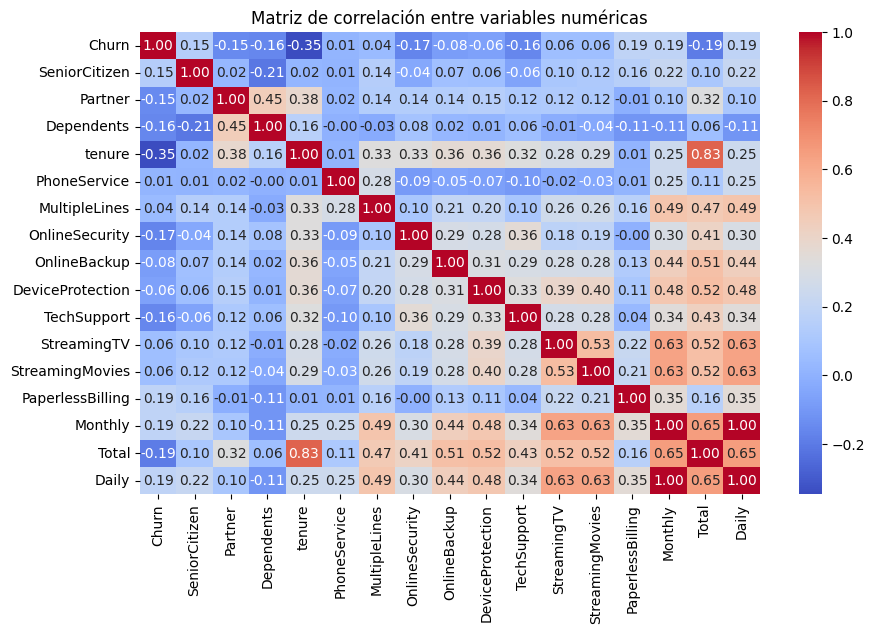

In [276]:
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de correlación entre variables numéricas')
plt.show()